# 1. Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# 2. Working with Images
## 2.1 Getting Started

In [2]:
img = cv2.imread(r'owl.jpg')
cv2.imshow("owl", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Note: Image is displayed in separate window.

In [3]:
img.shape

(612, 436, 3)

### Read Image in Grayscale

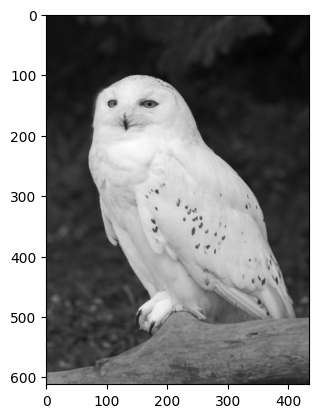

In [4]:
img_gray = cv2.imread(r'owl.jpg')
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [5]:
# Shape of Grayscale image
img_gray.shape

(612, 436)

### Write/Save Image

In [6]:
cv2.imwrite("owl_gray.jpg", img_gray)

True

### Color Spaces

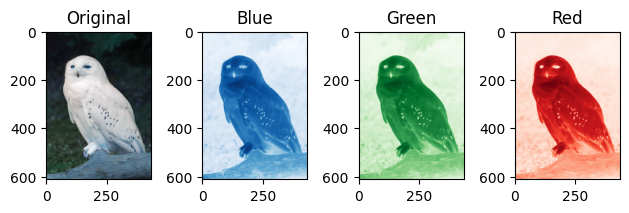

In [7]:
img = cv2.imread(r'owl.jpg')
red, green, blue = cv2.split(img)
fig, axes = plt.subplots(nrows=1, ncols=4, facecolor = 'white')

axes[0].imshow(img, )
axes[1].imshow(blue, cmap='Blues')
axes[2].imshow(green, cmap='Greens')
axes[3].imshow(red, cmap='Reds')

axes[0].set_title('Original')
axes[1].set_title('Blue')
axes[2].set_title('Green')
axes[3].set_title('Red')

fig.tight_layout()
plt.show()
# Matplotlib color Scheme = Red, Green, Blue.
# Opencv color scheme = Blue, Green, Red.

### Arithmetic Operations on Images

### Addition of Images
To add images both images should have equal shape.

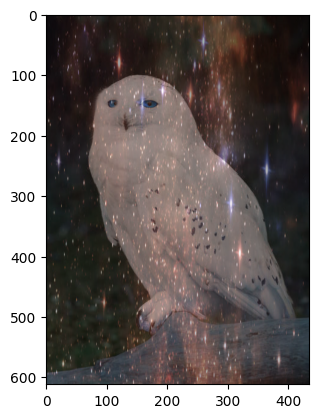

In [8]:
img = cv2.imread(r'owl.jpg')
img2 = cv2.imread(r'night_sky.jpg')
img2 = cv2.resize(img2, (436, 612))

# add images
weighted_sum = cv2.addWeighted(img, 0.5, img2, 0.6, 0)
plt.imshow(weighted_sum)

### Subtraction of Images

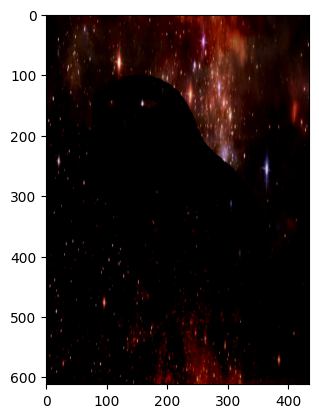

In [9]:
sub = cv2.subtract(img2, img)
plt.imshow(sub)

# Note that the white owl has been subtracted from the img2

### Bitwise Operations

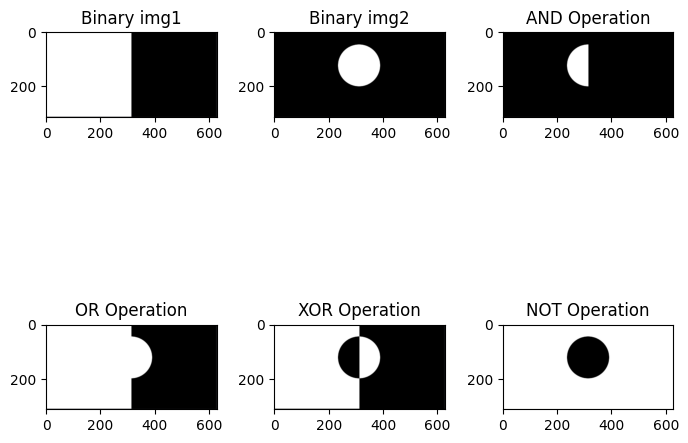

In [10]:
img = cv2.imread(r'Black _white1.png')
img2 = cv2.imread(r'Black_white2.png')
img2 = cv2.resize(img2, (img.shape[1], img.shape[0]))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

dest_AND = cv2.bitwise_and(img2, img, mask=None)
dest_OR = cv2.bitwise_or(img2, img, mask = None)
dest_XOR = cv2.bitwise_xor(img2, img, mask = None)
dest_NOT = cv2.bitwise_not(img2, mask = None)

fig, axes = plt.subplots(nrows=2, ncols=3, facecolor = 'white', figsize=(7, 6))
axes = axes.flatten()
fig.tight_layout()

axes[0].imshow(img)
axes[1].imshow(img2)
axes[2].imshow(dest_AND)
axes[3].imshow(dest_OR)
axes[4].imshow(dest_XOR)
axes[5].imshow(dest_NOT)

axes[0].set_title('Binary img1')
axes[1].set_title('Binary img2')
axes[2].set_title('AND Operation')
axes[3].set_title('OR Operation')
axes[4].set_title('XOR Operation')
axes[5].set_title('NOT Operation')

plt.show()

### Image Resizing

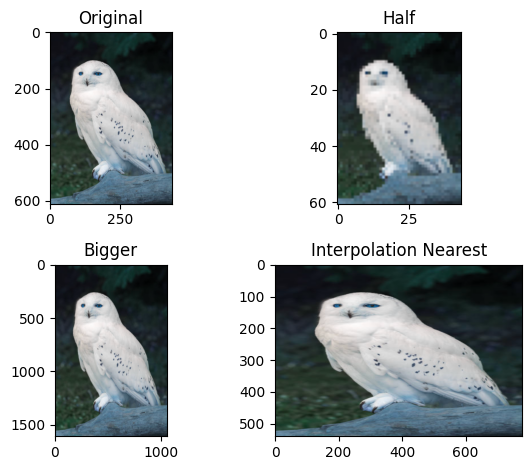

In [11]:
image = cv2.imread(r'owl.jpg')
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))

stretch_near = cv2.resize(image, (780, 540), 
               interpolation = cv2.INTER_LINEAR)


Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4

for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.tight_layout()
    plt.imshow(images[i])


plt.show()

### Image Erosion

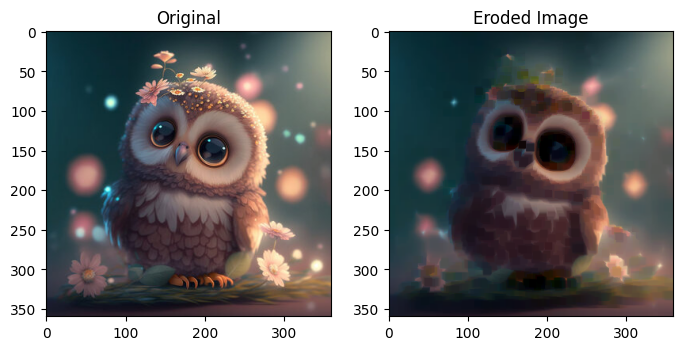

In [12]:
img = cv2.imread('owl2.jpg')       
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.uint8) 
eroded_img = cv2.erode(img, kernel, iterations=2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,7))
fig.tight_layout()

axes[0].imshow(img) 
axes[1].imshow(eroded_img)

axes[0].set_title('Original')
axes[1].set_title('Eroded Image')
plt.show() 

### Blurring an Image

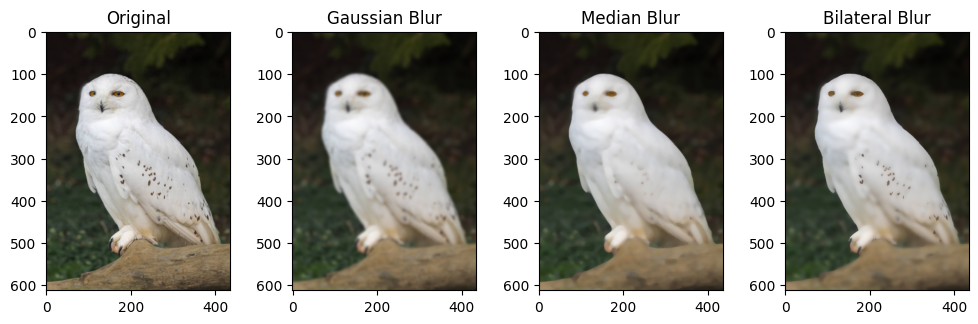

In [ ]:
img = cv2.imread('owl.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply different types of blurring
gaussian = cv2.GaussianBlur(img, (15, 15), 0)  
median = cv2.medianBlur(img, 11)              
bilateral = cv2.bilateralFilter(img, 15, 150, 150)  


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
fig.tight_layout()


axes[0].imshow(img)
axes[1].imshow(gaussian)
axes[2].imshow(median)
axes[3].imshow(bilateral)

axes[0].set_title('Original')
axes[1].set_title('Gaussian Blur')
axes[2].set_title('Median Blur')
axes[3].set_title('Bilateral Blur')


plt.show()

## Image Thresholding

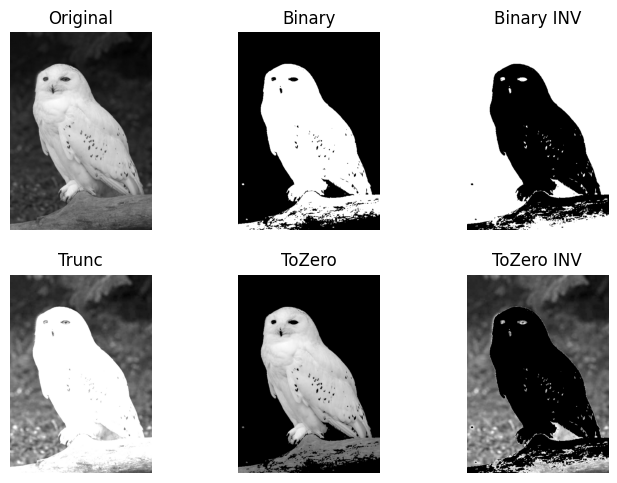

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 5))
axes = axes.flatten()

# Thresholding
ret, Thresh1 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
ret, Thresh1_INV = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
ret, Thresh2 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_TRUNC)
ret, Thresh3 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_TOZERO)
ret, Thresh3_INV = cv2.threshold(img_gray, 100, 255, cv2.THRESH_TOZERO_INV)

fig.tight_layout()

axes[0].imshow(img_gray, cmap='gray')
axes[1].imshow(Thresh1, cmap='gray')
axes[2].imshow(Thresh1_INV, cmap='gray')
axes[3].imshow(Thresh2, cmap='gray')
axes[4].imshow(Thresh3, cmap='gray')
axes[5].imshow(Thresh3_INV, cmap='gray')

titles = ['Original', 'Binary', 'Binary INV', 'Trunc', 'ToZero', 'ToZero INV']
for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.axis('off')  

plt.show()


<!-- ## Edge Detection -->

## Edge Detection

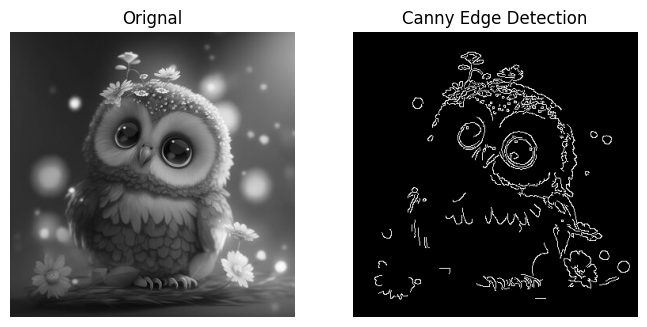

In [15]:
img = cv2.imread('owl2.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 100, 200)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 6))
fig.tight_layout()

axes[0].imshow(img, cmap='gray')
axes[1].imshow(edges, cmap='gray')

axes[0].set_title('Orignal')
axes[1].set_title('Canny Edge Detection')

titles = ['Orignal', 'Canny Edge Detection']

for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.axis('Off')
    

plt.show()

## Contour Detection

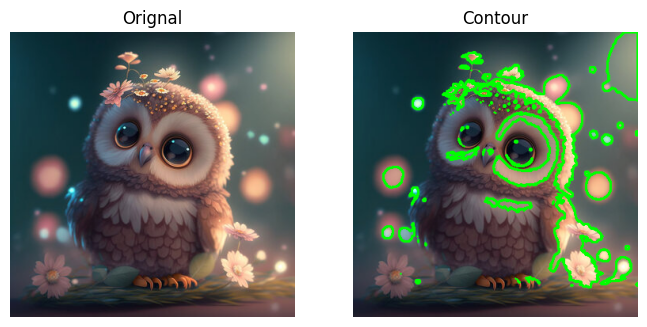

In [32]:
original_img = cv2.imread('owl2.jpg', cv2.IMREAD_COLOR_RGB)
img = original_img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(7, 6))

ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh ,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

fig.tight_layout()

axes[0].imshow(original_img)
axes[1].imshow(img)

titles = ['Orignal', 'Contour']

for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.axis('off')

plt.show()

## HoughLine

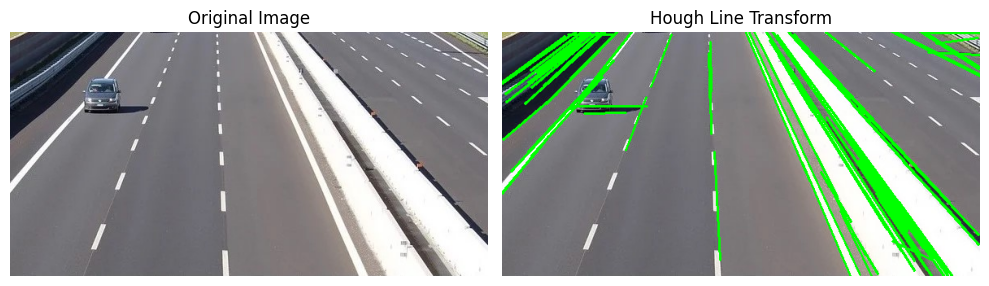

In [39]:
original_img = cv2.imread("road.jpg")
img = original_img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 100, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=10)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_img)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(img)
axes[1].set_title("Hough Line Transform")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## Video

In [40]:
cap = cv2.VideoCapture('sample.mp4')

if (cap.isOpened()== False):
    print("Error opening video file")

while(cap.isOpened()):

    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame', frame)
        
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else:
        break

cap.release()
cv2.destroyAllWindows()